In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [ ]:
data_frame = pd.read_csv("/content/Dsata Set for Assignment 1 (1).csv")

In [ ]:
data_frame['diagnosis'] = data_frame['diagnosis'].replace('B', 0)
data_frame['diagnosis'] = data_frame['diagnosis'].replace('M', 1)

In [ ]:
df = data_frame
df = df.dropna()
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

FEATURE ENGINEERING TASK-1

In [ ]:
df_fe = data_frame
columns = list(df_fe)
columns.remove('id')
columns.remove('diagnosis')


In [ ]:
#filling null values with mean
for col in columns:
    df_fe = df_fe.fillna({col: df_fe[col].mean()})

In [ ]:
df_fe.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

FEATURE ENGINEERING TASK-2

In [ ]:
#normalising data
norm_df = df_fe
for col in columns:
    norm_df[col] = ( df_fe[col] - df_fe[col].mean() ) / df_fe[col].std()

In [ ]:
norm_df = norm_df.sample(frac = 1)
df = df.sample(frac=1)

# **PART-A PERCEPTRON ALGORITHM**

In [ ]:
x = np.array(df[columns])
y = np.array(df['diagnosis'])

In [ ]:
train_size = int(0.67 * len(df))
x_test = x[train_size:]
x_train = x[:train_size]


In [ ]:
y_test = y[train_size:]
y_train = y[:train_size]


In [ ]:
#perceptron 
def perceptron(X_train, Y_train, learning_rate, iter, X_test, Y_test):
           bias = 0
           n_samples, n_features =  X_train.shape    
           weights = np.zeros(n_features)
           for it in range(iter):
               for i in range(n_samples):
                   lin_op = np.dot(X_train[i], weights) + bias
                   predicted_op = np.where(lin_op>=0, 1, 0)
                   update = learning_rate * (Y_train[i] - predicted_op)
                   weights += update * X_train[i]
                   bias += update 
           #testing 
           lin_op = np.dot(X_test, weights) + bias
           y_predicted =   np.where(lin_op >= 0, 1, 0)      
           accuracy =  np.sum(Y_test == y_predicted) / len(Y_test)
           return weights, bias, accuracy


# PM1

In [ ]:
#training for not normalised(nn) data
x_train_PM1 = x_train
y_train_PM1 = y_train
x_test_PM1 = x_test
y_test_PM1 = y_test
lr_PM1 = 0.01
iter_PM1 = 100
w_PM1, bias_PM1, accuracy_PM1 =  perceptron(x_train_PM1, y_train_PM1, lr_PM1, iter_PM1, x_test_PM1, y_test_PM1)
print(accuracy_PM1)

0.8870967741935484


# PM2

In [ ]:
#shuffling training examples
df2 = df.sample(frac = 1)
df2

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
261,888264,1,17.35,23.06,111.00,933.1,0.08662,0.06290,0.02891,0.02837,...,19.85,31.47,128.20,1218.0,0.1240,0.14860,0.12110,0.08235,0.2452,0.06515
98,862485,0,11.60,12.84,74.34,412.6,0.08983,0.07525,0.04196,0.03350,...,13.06,17.16,82.96,512.5,0.1431,0.18510,0.19220,0.08449,0.2772,0.08756
449,911157302,1,21.10,20.52,138.10,1384.0,0.09684,0.11750,0.15720,0.11550,...,25.68,32.07,168.20,2022.0,0.1368,0.31010,0.43990,0.22800,0.2268,0.07425
7,84458202,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.36820,0.26780,0.15560,0.3196,0.11510
399,904357,0,11.80,17.26,75.26,431.9,0.09087,0.06232,0.02853,0.01638,...,13.45,24.49,86.00,562.0,0.1244,0.17260,0.14490,0.05356,0.2779,0.08121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,852763,1,14.58,21.53,97.41,644.8,0.10540,0.18680,0.14250,0.08783,...,17.62,33.21,122.40,896.9,0.1525,0.66430,0.55390,0.27010,0.4264,0.12750
135,868202,1,12.77,22.47,81.72,506.3,0.09055,0.05761,0.04711,0.02704,...,14.49,33.37,92.04,653.6,0.1419,0.15230,0.21770,0.09331,0.2829,0.08067
10,845636,1,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,...,19.19,33.88,123.80,1150.0,0.1181,0.15510,0.14590,0.09975,0.2948,0.08452
241,883539,0,12.42,15.04,78.61,476.5,0.07926,0.03393,0.01053,0.01108,...,13.20,20.37,83.85,543.4,0.1037,0.07776,0.06243,0.04052,0.2901,0.06783


In [ ]:
x_PM2 = np.array(df2[columns])
y_PM2 = np.array(df2['diagnosis'])

In [ ]:
x_train_PM2 = x_PM2[:train_size]
x_test_PM2 = x_PM2[train_size:]
y_train_PM2 = y_PM2[:train_size]
y_test_PM2 = y_PM2[train_size:]


In [ ]:
lr_PM2 = 0.01
iter_PM2 = 100
weights_PM2, bias_PM2, accuracy_PM2 = perceptron(x_train_PM2, y_train_PM2, lr_PM2, iter_PM2, x_test_PM2, y_test_PM2)
accuracy_PM2

0.946236559139785

# PM3

In [ ]:
columns_norm = list(norm_df)
columns_norm.remove('diagnosis')
columns_norm.remove('id')
x_norm = np.array(norm_df[columns_norm])
y_norm = np.array(norm_df['diagnosis'])

In [ ]:
train_size_norm = int(0.67 * len(norm_df))
x_norm_test = x_norm[train_size_norm:]
x_norm_train = x_norm[:train_size_norm]

In [ ]:
y_norm_test = y_norm[train_size_norm:]
y_norm_train= y_norm[:train_size_norm]

In [ ]:
x_PM3_train = x_norm_train
x_PM3_test = x_norm_test
y_PM3_train = y_norm_train
y_PM3_test = y_norm_test

In [ ]:
iter_PM3 = 100
lr_PM3= 0.01
weights_PM3, bias_PM3, accuracy_PM3 =  perceptron(x_PM3_train, y_PM3_train, lr_PM3, iter_PM3, x_PM3_test, y_PM3_test)
print(accuracy_PM3)

0.9308510638297872


# PM4

In [ ]:
#shuffling features
df4 = df
df4 = df.sample(frac = 1,axis = 1).sample(frac = 1).reset_index(drop = True)
df4

,perimeter_se,symmetry_worst,perimeter_worst,concave points_se,id,concavity_se,texture_worst,texture_se,compactness_mean,area_se,...,perimeter_mean,fractal_dimension_worst,symmetry_mean,area_mean,area_worst,smoothness_mean,radius_worst,compactness_worst,smoothness_se,concavity_worst
0,1.955,0.2305,83.51,0.015530,9111596,0.066630,28.18,1.5540,0.10640,20.24,...,76.83,0.09952,0.1349,432.0,507.2,0.06613,12.79,0.33990,0.006854,0.32180
1,2.155,0.2710,73.20,0.000000,871642,0.000000,19.20,1.9250,0.04302,21.98,...,67.49,0.06164,0.1928,349.6,408.3,0.08792,11.54,0.06791,0.008713,0.00000
2,1.164,0.2733,78.27,0.008849,8910748,0.012820,16.18,0.5293,0.07608,13.17,...,72.23,0.08022,0.1769,388.0,457.5,0.09834,12.32,0.15070,0.006472,0.12750
3,3.466,0.2866,125.40,0.022340,907914,0.079260,27.57,0.8749,0.22250,24.19,...,102.10,0.11550,0.2041,685.0,832.7,0.09947,16.35,0.70900,0.006965,0.90190
4,2.397,0.3207,96.31,0.010650,904689,0.034520,24.61,1.2990,0.07899,20.21,...,84.18,0.07247,0.1874,525.2,621.9,0.07351,14.13,0.23180,0.003629,0.16040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,2.587,0.3151,162.30,0.008185,887549,0.021170,39.16,1.0330,0.10880,52.34,...,132.90,0.07999,0.1814,1288.0,1844.0,0.10000,24.33,0.29450,0.005043,0.37880
559,2.567,0.2107,93.96,0.004821,893548,0.002831,17.40,0.8285,0.03735,33.01,...,82.71,0.06580,0.1453,530.6,672.4,0.08352,14.73,0.05847,0.004148,0.01824
560,2.044,0.2506,98.84,0.009057,8813129,0.022590,23.60,0.8907,0.04994,24.68,...,84.55,0.07623,0.1496,546.4,708.8,0.08445,15.14,0.13110,0.006032,0.17860
561,2.099,0.2678,97.59,0.009366,862009,0.018720,25.94,1.3730,0.08165,25.22,...,86.60,0.06603,0.1638,555.1,699.4,0.10220,15.10,0.17510,0.005884,0.13810


In [ ]:
x_PM4 = np.array(df4[columns])
y_PM4 = np.array(df4['diagnosis'])

In [ ]:
x_train_PM4 = x_PM4[:train_size]
x_test_PM4 = x_PM4[train_size:]
y_train_PM4= y_PM4[:train_size]
y_test_PM4= y_PM4[train_size:]

In [ ]:
lr_PM4 = 0.01
iter_PM4 = 100
weights_PM4, bias_PM4, accuracy_PM4 = perceptron(x_train_PM4, y_train_PM4, lr_PM4, iter_PM4, x_test_PM4, y_test_PM4)
accuracy_PM4

0.9139784946236559

# **PART-B FISCHER'S LINEAR DISCRIMINANT ANALYSIS**

# Learning Task 1

In [ ]:
#NormalizedDataset
df_lda = norm_df

In [ ]:
x_lda = np.array(norm_df[columns])
y_lda = np.array(norm_df['diagnosis'])

In [ ]:
#Test-Train-Split
train_size_lda = int(0.67 * len(norm_df))

x_test_lda = x[train_size_lda:]
x_train_lda = x[:train_size_lda]
y_test_lda = y[train_size_lda:]
y_train_lda = y[:train_size_lda]

In [ ]:
def plotLDAProjection(projection,y):
    C1_ = np.where(y==1)[0]
    C2_ = np.where(y==0)[0]
    projection1 = []
    projection2 = []
    
    for i in C1_:
        projection1.append(projection[i][0])
    for i in C2_:
        projection2.append(projection[i][0])
    
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title('Projection of raw data onto W')
    ax.set_xlabel('projection')
    ax.set_ylabel('')
    
    ax.plot(projection1[:C1_.shape[0]],np.zeros(C1_.shape[0]), linestyle='None', marker='o', markersize=7, color='blue', label='M')
    ax.plot(projection2[:C2_.shape[0]], np.zeros(C2_.shape[0]), linestyle='None', marker='o', markersize=7, color='red', label='B')
    ax.legend()
    fig.set_size_inches(7, 7)
    fig.show()

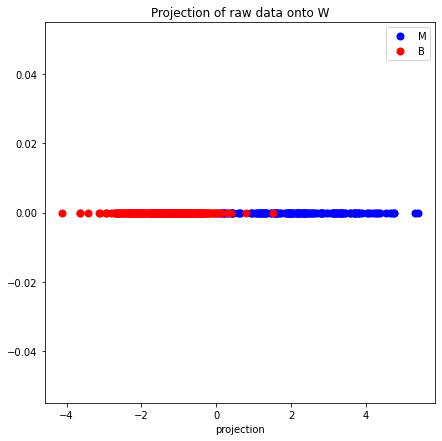

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

#FDLM Reduction to 1 Dimension
model = LDA(n_components = 1)

x_lda_transformed = model.fit_transform(x_train_lda,y_train_lda)
x_test_transformed = model.transform(x_test_lda)

plotLDAProjection(x_lda_transformed,y_train_lda)

In [ ]:
def roots (mean1, mean2, std1, std2):
  a = 1/(2*std1**2) - 1/(2*std2**2)
  b = mean2/(std2**2) - mean1/(std1**2)
  c = mean1**2/(2*std1**2) - mean2**2/(2*std2**2) - np.log(std2/std1)

  return np.roots([a,b,c])

In [ ]:
def Compute_Discriminant(projection,y):
  C1_ = np.where(y==1)[0]
  C2_ = np.where(y==0)[0]
  proj1 =[]
  proj2 =[]
  for i in C1_:
    proj1.append(projection[i][0])
  for i in C2_:
    proj2.append(projection[i][0])
  
  m1, std1 = norm.fit(proj1)
  m2, std2 = norm.fit(proj2)

  max = np.array(projection).max()
  min = np.array(projection).min()

  root = roots(m1,m2,std1,std2)

  for i in range(len(root)):
    if root[i] < max and root[i] > min:
      Discriminant = root[i]
      

      return Discriminant,proj1,proj2

In [ ]:
def plotNormal(projection,y,Discriminant):
  C1_ = np.where(y==1)[0]
  C2_ = np.where(y==0)[0]
  proj1 =[]
  proj2 =[]
  for i in C1_:
    proj1.append(projection[i][0])
  for i in C2_:
    proj2.append(projection[i][0])
  
  m1, std1 = norm.fit(proj1)
  m2, std2 = norm.fit(proj2)

  fig = plt.figure()
  ax = fig.add_subplot(1,1,1)
  ax.set_title("Normally Distributed Projections")
  ax.set_xlabel("Projection")
  ax.set_ylabel('')

  Z1 = np.linspace(m1-5*std1,m1+5*std1,1000)
  Z2 = np.linspace(m2-5*std2,m2+5*std2,1000)

  ax.plot(Z1,norm.pdf(Z1,m1,std1),linestyle = 'None', marker = 'o',markersize=2, color='blue', label='M')
  ax.plot(Z2,norm.pdf(Z2,m2,std2),linestyle = 'None', marker = 'o',markersize=2, color='red', label='B')
  
  plt.axvline(x=Discriminant,markersize=7,color='purple' ,label='line at x = {}'.format(Discriminant))  
  ax.legend()
  fig.set_size_inches(7,7)
  fig.show()

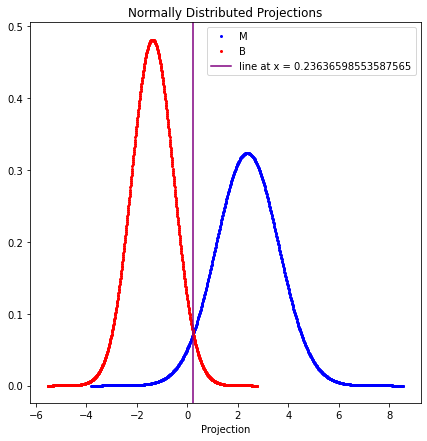

In [ ]:
global Discriminant, proj1, proj2

Discriminant, proj1, proj2 = Compute_Discriminant(x_lda_transformed,y_train_lda)
plotNormal(x_lda_transformed,y_train_lda,Discriminant)

In [ ]:
def metrics(Discriminant,projection,y):
    C1_ = np.where(y==1)[0]
    C2_ = np.where(y==0)[0]
    proj1 = []
    proj2 = []
    for i in C1_:
        proj1.append(projection[i][0])
        pass
    for i in C2_:
        proj2.append(projection[i][0])

    #Class Counts    
    c_1 = 0
    c_2 = 0

    #Count of Results
    truepos = 0
    trueneg = 0
    falpos = 0
    falneg = 0

    #Counting the Number of results
    for i in proj1:
            if(i>Discriminant):
                c_1 = c_1 + 1
    for i in proj2:
        if(i>Discriminant):
            c_2 = c_2 + 1

#class label attributes
    if(c_1>c_2):
        for i in proj1:
            if(i>=Discriminant):
                truepos = truepos + 1
            else:
                falneg = falneg + 1
            
        for i in proj2:
            if(i<=Discriminant):
                trueneg = trueneg + 1
            else:
                falpos = falpos+1
    else:
        for i in proj2:
            if(i>=Discriminant):
                truepos = truepos + 1
            else:
                falneg = falneg + 1
            
        for i in proj1:
            if(i<=Discriminant):
                trueneg = trueneg + 1
            else:
                falpos = falpos+1
     
    
    accuracy = (truepos+trueneg)/(truepos+trueneg+falpos+falneg)
   
    precision = truepos/(truepos+falpos)
    recall = truepos/(truepos+falneg)
    
    #F1 score, no. of times a correct call has been made on the dataset
    F1_score = 2*precision*recall/(precision+recall)
    print("Accuracy : ",accuracy)
    print("Precision : ", precision)
    print("Recall: ", recall)
    print("F1_score :",F1_score)

In [ ]:
metrics(Discriminant,x_test_transformed,y_test_lda)

Accuracy :  0.9615384615384616
Precision :  0.9705882352941176
Recall:  0.9295774647887324
F1_score : 0.9496402877697842


# Learning Task 2

In [ ]:
df_flda2 = df.sample(frac = 1,axis = 1).sample(frac = 1)

In [ ]:
x_flda2 = np.array(df_flda2[columns])
y_flda2 = np.array(df_flda2['diagnosis'])

x_train_flda2 = x_flda2[:train_size]
x_test_flda2 = x_flda2[train_size:]
y_train_flda2= y_flda2[:train_size]
y_test_flda2= y_flda2[train_size:]

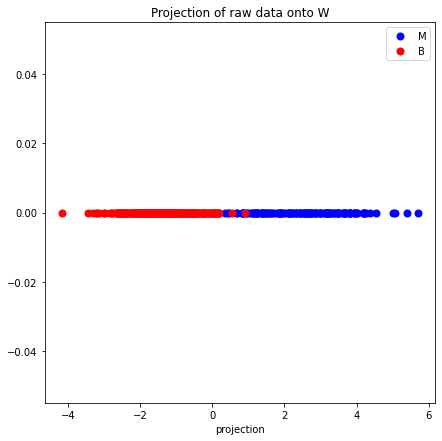

In [ ]:
x_flda2_transformed = model.fit_transform(x_train_flda2,y_train_flda2)
x_test2_transformed = model.transform(x_test_flda2)
plotLDAProjection(x_flda2_transformed,y_train_flda2)

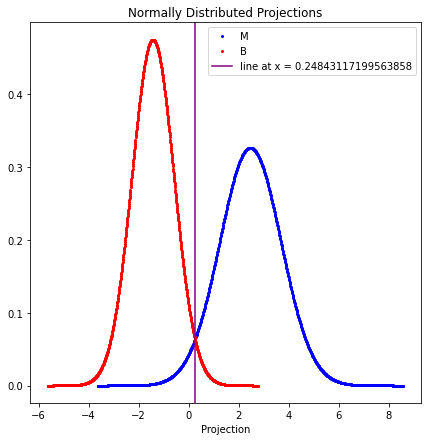

In [ ]:
global Discriminant2, proj1t, proj2t

Discriminant2, proj1t, proj2t = Compute_Discriminant(x_flda2_transformed,y_train_flda2)

plotNormal(x_flda2_transformed,y_train_flda2,Discriminant2)

In [ ]:
metrics(Discriminant2,x_test2_transformed,y_test_flda2)

Accuracy :  0.9516129032258065
Precision :  0.9846153846153847
Recall:  0.8888888888888888
F1_score : 0.9343065693430657


# **PART-C LOGISTIC REGRESSION**

In [ ]:
def sigmoid_function(x):
  return 1/(1+np.exp(-x))

In [ ]:
def accuracy(x_test, y_test, w, b, prob_thresh):
    z = np.dot(w.T, x_test) + b 
    a = sigmoid_function(z)
    a = a>prob_thresh
    a = np.array(a)
    accur = (1 - np.sum(np.absolute(a-y_test))/y_test.shape[1])
    return accur

In [ ]:
def batch(x,y, lr, iter):
    m, n = x.T.shape
    w = np.zeros((n,1))
    bias = 0 
    cost_list = []
    for i in range(iter):
        z = np.dot(w.T, x) + bias
        a = sigmoid_function(z)
        cost = -(1/m)*np.sum(y*np.log(10**-15+a)+(1-y)*np.log(10**-15+1-a))
        dw = np.dot(a-y, x.T)/m
        db = np.sum(a-y)/m
        w = w - lr*dw.T
        bias = bias - lr*db
        cost_list.append(cost)
        
    return w, bias, cost_list



In [ ]:
def stochastic(x,y, lr, iter):
    m = x.shape[0]
    n = x.shape[1]
    W_iter = np.zeros((n,1))
    bias = 0 
    cost_list = []
    for i in range(iter):
        ran_idx= np.random.randint(0,m-1)
        x_batch = x[ran_idx]
        y_batch = y[ran_idx]
        z = np.dot(W_iter.T, x_batch) + bias
        a = sigmoid_function(z)
        cost = -(1/m)*np.sum(y_batch*np.log(10**-15+a)+(1-y_batch)*np.log(10**-15+1-a))
        dw = np.dot((a-y_batch.reshape(1,1)), x_batch.reshape(1,30))/m
        db = np.sum(a-y_batch)/m
        W_iter = W_iter - lr*dw.T
        bias = bias - lr*db
        cost_list.append(cost)
       
    return W_iter, bias, cost_list

# Learning Task 1 

In [ ]:
x_train_LR = x_train.T
y_train_LR = y_train.reshape(1,377)
x_test_LR = x_test.T
y_test_LR = y_test.reshape(1,186)
x_train_LR.shape

(30, 377)

In [ ]:
iter_batch_LR1 = 10000
lr_batch_LR1 = 0.01
W_batch_LR1, B_batch_LR1, cost_list_batch_LR1 = batch(x_train_LR, y_train_LR, lr_batch_LR1, iter_batch_LR1)

<ipython-input-47-e5ae8e525aa9>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


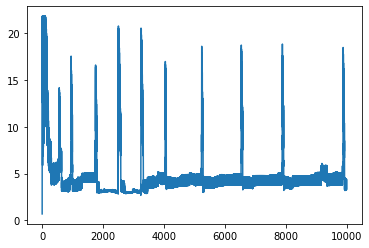

In [ ]:
plt.plot(np.arange(iter_batch_LR1), cost_list_batch_LR1)
plt.show()

In [ ]:
accuracy(x_test_LR, y_test_LR, W_batch_LR1, B_batch_LR1,0.5)

<ipython-input-47-e5ae8e525aa9>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


0.9193548387096774

MINI

In [ ]:
x_mini = np.array_split(x_train_LR, 6, axis=1)
y_mini = np.array_split(y_train_LR, 6, axis=1)

In [ ]:
iter_mini_LR1 = 10000
lr_mini_LR1 = 0.01
w_mini_LR1 = np.zeros((x_train_LR.shape[0],1))
b_mini_LR1 = 0
cost_list_mini_LR1 = []
for i in range(6):
		wts, bias_mini_LR1, cl_mini_LR1 = batch(x_mini[i], y_mini[i], lr_mini_LR1, iter_mini_LR1)
		w_mini_LR1 += wts
		b_mini_LR1 += bias_mini_LR1
		cost_list_mini_LR1 +=  cl_mini_LR1

<ipython-input-47-e5ae8e525aa9>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


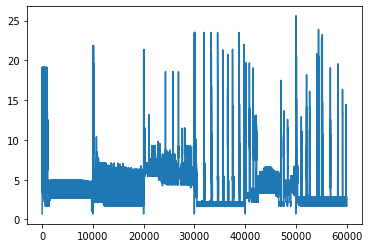

In [ ]:
plt.plot(np.arange(iter_mini_LR1*6), cost_list_mini_LR1)
plt.show()

In [ ]:
accuracy(x_test_LR, y_test_LR, w_mini_LR1, b_mini_LR1, 0.5)

<ipython-input-47-e5ae8e525aa9>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


0.946236559139785

STOCHASTIC

In [ ]:
x_stoch_LR1 = x_train
y_stoch_LR1 = y_train

In [ ]:
iter_stoch_LR1 = 1000
lr_stoch_LR1 = 0.01
wt_stoch_LR1, b_stoch_LR1, cost_list_stoch_LR1 = stochastic(x_stoch_LR1, y_stoch_LR1, lr_stoch_LR1, iter_stoch_LR1)


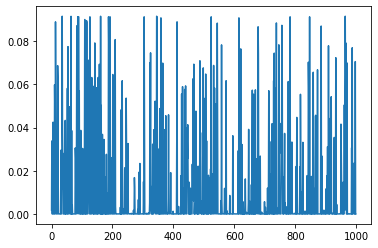

In [ ]:
plt.plot(np.arange(iter_stoch_LR1), cost_list_stoch_LR1)
plt.show()

In [ ]:
accuracy(x_test_LR, y_test_LR, wt_stoch_LR1, b_stoch_LR1, 0.7)

0.8172043010752688

# *Learning Task 2*

In [ ]:
x_train_LR2 = x_norm_train.T
y_train_LR2 = y_norm_train.reshape(1,381)
x_test_LR2 = x_norm_test.T
y_test_LR2 = y_norm_test.reshape(1,188)
x_train_LR2.shape

(30, 381)

In [ ]:
iter_batch_LR2 = 10000
lr_batch_LR2 = 0.01
w_batch_LR2, b_batch_LR2, cost_list_batch_LR2 = batch(x_train_LR2, y_train_LR2, lr_batch_LR2, iter_batch_LR2)

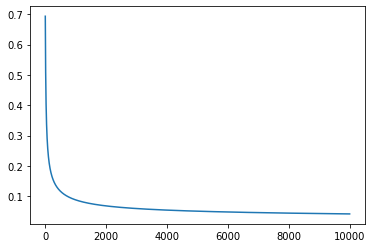

In [ ]:
plt.plot(np.arange(iter_batch_LR2), cost_list_batch_LR2)
plt.show()

In [ ]:
accuracy(x_test_LR2, y_test_LR2, w_batch_LR2, b_batch_LR2,0.5)

0.9627659574468085

MINI

In [ ]:
x_mini = np.array_split(x_train_LR2, 6, axis=1)
y_mini = np.array_split(y_train_LR2, 6, axis=1)

In [ ]:
iter_mini_LR2 = 10000
lr_mini_LR2 = 0.01
w_mini_LR2 = np.zeros((x_train_LR2.shape[0],1))
b_mini_LR2 = 0
cost_list_mini_LR2 = []
for i in range(6):
	wts_mini_LR2, bias_mini_LR2, cl_mini_LR2 = batch(x_mini[i], y_mini[i], lr_mini_LR2, iter_mini_LR2)
	w_mini_LR2 += wts_mini_LR2
	b_mini_LR2 += bias_mini_LR2
	cost_list_mini_LR2 +=  cl_mini_LR2

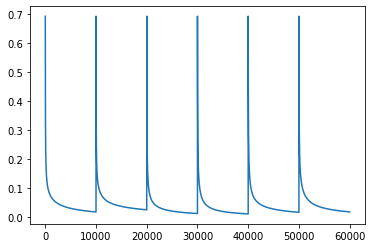

In [ ]:
plt.plot(np.arange(iter_mini_LR2*6), cost_list_mini_LR2)
plt.show()

In [ ]:
accuracy(x_test_LR2, y_test_LR2, w_mini_LR2, b_mini_LR2, 0.7)

0.9680851063829787

STOCHASTIC

In [ ]:
x_stoch_LR2 = x_norm_train
y_stoch_LR2 = y_norm_train

In [ ]:
iter_stoch_LR2 = 1000
lr_stoch_LR2 = 0.01

wt_stoch_LR2, b_stoch_LR2, cost_list_stoch_LR2 = stochastic(x_stoch_LR2, y_stoch_LR2, lr_stoch_LR2, iter_stoch_LR2)


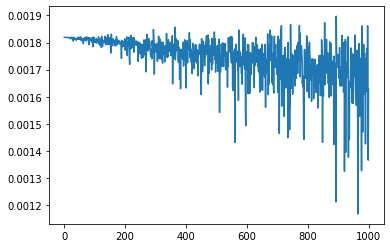

In [ ]:
plt.plot(np.arange(iter_stoch_LR2), cost_list_stoch_LR2)
plt.show()

In [ ]:
accuracy(x_test_LR2, y_test_LR2, wt_stoch_LR2, b_stoch_LR2, 0.5)

0.9042553191489362